# Project:Predictive Modeling for  Pricing and Star Ratings for Shoe Brands 

# Detail:
A company in the footwear industry wants to enhance its pricing strategy and understand the factors influencing customer satisfaction, particularly star ratings, for its products. They have collected data on various attributes of their shoes and customer reviews.

# Data Description:
The dataset includes the following features:

Shoe_Name: Name of the shoe.
Categories: Categories of the shoe (Men's, Women's, etc.).
Num_colors: Number of colors available for the shoe.
Price: Price of the shoe.
shoe_urls: URLs for the shoe.
Product_Code: Product code or identifier.
Color_Option: Color options for the shoe.
Count_of_Sizes: Number of available sizes for the shoe.
Description: Product description.
Number_of_Reviews: Number of customer reviews.
Comfort: Comfort rating category.
Star_Rating: Star rating given by customers.
Quality: Quality label.

# Objectives:

Price Prediction:

Build a machine learning model to predict the price of shoes based on selected features like the count of sizes and the number of reviews.
Optimize the model to avoid underfitting or overfitting using appropriate techniques such as hyperparameter tuning and feature scaling.
Star Rating Prediction:

Develop a machine learning model to predict the star ratings of shoes based on features like the count of sizes, number of reviews, quality, and comfort.
Ensure the model is robust and not prone to underfitting or overfitting by employing advanced techniques in hyperparameter tuning and feature scaling.

# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import scipy.stats as stats
from scipy.stats import zscore

from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor


from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


# Loading Dataset

In [2]:
df1 = pd.read_csv('Table1.csv')

In [3]:
df2 = pd.read_csv('Table2.csv')

In [4]:
df3 = pd.read_csv('Table3.csv')

In [5]:
# Combine both tables into a single DataFrame
df_combined = pd.concat([df1, df2], axis=1)

# Save the combined DataFrame to a CSV file
df_combined.to_csv("df1df2_Table.csv", index=False)


In [6]:
df=pd.concat([df_combined, df3], axis=1)


In [7]:
df.to_csv("concatenated_dataframe.csv", index=False)


# Exploratory data analysis (EDA)

In [8]:
df.head()

,Shoe_Name,Categories,Num_colors,Price,Count of Sizes,colors 1,color 2,color3,color4,color5,Product_Code,Number_of_Review,All_Sizes,Comfort,Quality,Star_Rating
0,Air Jordan 1 Retro High,Women's Shoes,1 Color,"₺2,899.99\n₺4,099.90\n29% discount",15.0,Gösterilen Renk: Medium Grey,Beyaz,Siyah,NaN,NaN,Stil: DZ2523-001,18.0,"['EU 35.5', 'EU 36', 'EU 36.5', 'EU 37.5', 'EU...",Excellent,Excellent,4.9
1,Nike Air Force 1 '07,Women's Shoes,10 Colors,"₺3,799.90",15.0,Gösterilen Renk: Beyaz,Beyaz,Beyaz,Beyaz,NaN,Stil: DD8959-100,367.0,"['EU 35.5', 'EU 36', 'EU 36.5', 'EU 37.5', 'EU...",Excellent,Excellent,4.7
2,Nike Blazer Mid Pro Club,Man shoes,2 Colors,"₺2,399.99\n₺3,299.90\n27% discount",16.0,Gösterilen Renk: Beyaz,Light Bone,Summit White,Siyah,NaN,Stil: DQ7673-100,35.0,"['EU 38.5', 'EU 39', 'EU 40', 'EU 40.5', 'EU 4...",Good,Good,4.1
3,Air Jordan 1 Elevate Low,Women's Shoes,1 Color,"₺2,299.99\n₺3,199.90\n28% discount",15.0,Gösterilen Renk: Beyaz,Beyaz,Neutral Grey,NaN,NaN,Stil: DH7004-110,34.0,"['EU 35.5', 'EU 36', 'EU 36.5', 'EU 37.5', 'EU...",Excellent,Excellent,4.5
4,Air Jordan 1 Low SE,Man shoes,1 Color,"₺2,399.99\n₺3,399.90\n29% discount",16.0,Gösterilen Renk: Pistachio Frost,Aquatone,Psychic Purple,Celestial Gold,NaN,Stil: DX4334-300,33.0,"['EU 40', 'EU 40.5', 'EU 41', 'EU 42', 'EU 42....",Excellent,Excellent,4.8


In [9]:
df.tail()

,Shoe_Name,Categories,Num_colors,Price,Count of Sizes,colors 1,color 2,color3,color4,color5,Product_Code,Number_of_Review,All_Sizes,Comfort,Quality,Star_Rating
1289,Brown boots for men,NaN,NaN,₹16995₹12746,2.0,['BROWN'],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1290,Woodland CAMEL hiking boots,NaN,NaN,₹6995₹3000,2.0,['CAMEL'],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1291,Black boots for men,NaN,NaN,₹15995₹11996,2.0,['BLACK'],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1292,Desert Boot BROWN,NaN,NaN,₹6995₹4197,3.0,['BROWN'],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1293,Brown hiking shoes for men,NaN,NaN,₹15995₹9597,1.0,['BROWN'],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In this Raw data currency in three type .so i have to convert in dollar.

In [10]:
import pandas as pd
import re

# Assuming df is your DataFrame
tl_to_usd_rate = 0.034
inr_to_usd_rate = 0.012

# Function to convert various currencies to USD
def convert_to_usd(row):
    price = row['Price']
    
    if isinstance(price, str):
        # Extract all numeric values from the string
        numeric_values = [float(match.replace(',', '')) for match in re.findall(r'(\d[\d,.]*\d|\d)', price)]
        
        if '₺' in price:  # Convert TL to USD
            # Calculate the average of numeric values
            if numeric_values:
                average_price = sum(numeric_values) / len(numeric_values)
                return average_price * tl_to_usd_rate
        
        elif '₹' in price:  # Convert INR to USD
            # Calculate the average of numeric values
            if numeric_values:
                average_price = sum(numeric_values) / len(numeric_values)
                return average_price * inr_to_usd_rate
    
    return None

# function to create a new 'Price_USD' column
df['Price_USD'] = df.apply(convert_to_usd, axis=1)

#  DataFrame with the new 'Price_USD' column
print(df[['Shoe_Name', 'Price', 'Price_USD']])


                        Shoe_Name                               Price  \
0         Air Jordan 1 Retro High  ₺2,899.99\n₺4,099.90\n29% discount   
1            Nike Air Force 1 '07                           ₺3,799.90   
2        Nike Blazer Mid Pro Club  ₺2,399.99\n₺3,299.90\n27% discount   
3        Air Jordan 1 Elevate Low  ₺2,299.99\n₺3,199.90\n28% discount   
4             Air Jordan 1 Low SE  ₺2,399.99\n₺3,399.90\n29% discount   
...                           ...                                 ...   
1289          Brown boots for men                        ₹16995₹12746   
1290  Woodland CAMEL hiking boots                          ₹6995₹3000   
1291          Black boots for men                        ₹15995₹11996   
1292            Desert Boot BROWN                          ₹6995₹4197   
1293   Brown hiking shoes for men                         ₹15995₹9597   

       Price_USD  
0      79.660753  
1     129.196600  
2      64.904753  
3      62.649420  
4      66.060753  
...      

In [11]:
# Drop the original 'Price' column
df.drop('Price', axis=1, inplace=True)

# Rename the 'Price_USD' column to 'Price'
df.rename(columns={'Price_USD': 'Price'}, inplace=True)
print(df)


                        Shoe_Name     Categories Num_colors  Count of Sizes  \
0         Air Jordan 1 Retro High  Women's Shoes    1 Color            15.0   
1            Nike Air Force 1 '07  Women's Shoes  10 Colors            15.0   
2        Nike Blazer Mid Pro Club      Man shoes   2 Colors            16.0   
3        Air Jordan 1 Elevate Low  Women's Shoes    1 Color            15.0   
4             Air Jordan 1 Low SE      Man shoes    1 Color            16.0   
...                           ...            ...        ...             ...   
1289          Brown boots for men            NaN        NaN             2.0   
1290  Woodland CAMEL hiking boots            NaN        NaN             2.0   
1291          Black boots for men            NaN        NaN             2.0   
1292            Desert Boot BROWN            NaN        NaN             3.0   
1293   Brown hiking shoes for men            NaN        NaN             1.0   

                              colors 1     color 2 

Here deleting Price from df and Price USD saved as Price in df

In [12]:
df.shape

(1294, 16)

In [13]:
df.columns

Index(['Shoe_Name', 'Categories', 'Num_colors', 'Count of Sizes', 'colors 1',
       'color 2', 'color3', 'color4', 'color5', 'Product_Code',
       'Number_of_Review', 'All_Sizes', 'Comfort', 'Quality', 'Star_Rating',
       'Price'],
      dtype='object')

In [14]:
# Check for missing values
missing_values = df.isnull().sum()
print(missing_values)

Shoe_Name              0
Categories           119
Num_colors           140
Count of Sizes       113
colors 1              52
color 2              290
color3               425
color4               792
color5              1294
Product_Code         192
Number_of_Review     423
All_Sizes            213
Comfort              258
Quality              427
Star_Rating          251
Price                150
dtype: int64


this outcome show many missing value is present.

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1294 entries, 0 to 1293
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Shoe_Name         1294 non-null   object 
 1   Categories        1175 non-null   object 
 2   Num_colors        1154 non-null   object 
 3   Count of Sizes    1181 non-null   float64
 4   colors 1          1242 non-null   object 
 5   color 2           1004 non-null   object 
 6   color3            869 non-null    object 
 7   color4            502 non-null    object 
 8   color5            0 non-null      float64
 9   Product_Code      1102 non-null   object 
 10  Number_of_Review  871 non-null    float64
 11  All_Sizes         1081 non-null   object 
 12  Comfort           1036 non-null   object 
 13  Quality           867 non-null    object 
 14  Star_Rating       1043 non-null   float64
 15  Price             1144 non-null   float64
dtypes: float64(5), object(11)
memory usage: 16

# Outcome

Columns with Null Values:

Categories, Num_colors, Price, Count of Sizes, colors 1, color 2, color3, color4, Product_Code, Number_of_Review, All_Sizes, Comfort, Quality, Star_Rating

Column with All Null Values:

color5

Float Columns:Price,Count of Sizes,Number_of_Review,Star_Rating,color5,

Object Columns:Shoe_Name,Shoe_Name,Categories,Num_colors,color 2,colors 1,color3,color4,Product_Code,All_Sizes,Comfort,Quality


In [16]:
#remove trrelevent column which have high missing value
df.drop(['color5'], axis=1, inplace=True)

# Handling Missing Value

In [17]:
# For numerical columns
df['Price'].fillna(df['Price'].mean(), inplace=True)
df['Count of Sizes'].fillna(df['Count of Sizes'].median(), inplace=True)
df['Number_of_Review'].fillna(df['Number_of_Review'].mean(), inplace=True)
df['Star_Rating'].fillna(df['Star_Rating'].mean(), inplace=True)

In [18]:
categorical_columns = ['Num_colors','Categories' ,'colors 1', 'color 2', 'color3', 'color4', 'Product_Code', 'All_Sizes', 'Comfort', 'Quality']

for column in categorical_columns:
    df[column].fillna(df[column].mode()[0], inplace=True)


In [19]:
# Checking for the missing values in the dataset:

df.isnull().sum()

Shoe_Name           0
Categories          0
Num_colors          0
Count of Sizes      0
colors 1            0
color 2             0
color3              0
color4              0
Product_Code        0
Number_of_Review    0
All_Sizes           0
Comfort             0
Quality             0
Star_Rating         0
Price               0
dtype: int64

No missing value present here after handling

# visualization

Text(0.5, 1.0, 'Distribution of Count of Sizes')

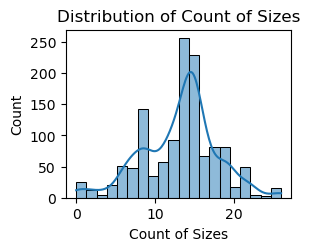

In [20]:
# Distribution of 'Count of Sizes'
plt.subplot(2, 2, 1)
sns.histplot(df['Count of Sizes'], bins=20, kde=True)
plt.title('Distribution of Count of Sizes')

maximum count sizes present in between 10 to 20

Text(0.5, 1.0, 'Distribution of Number of Reviews')

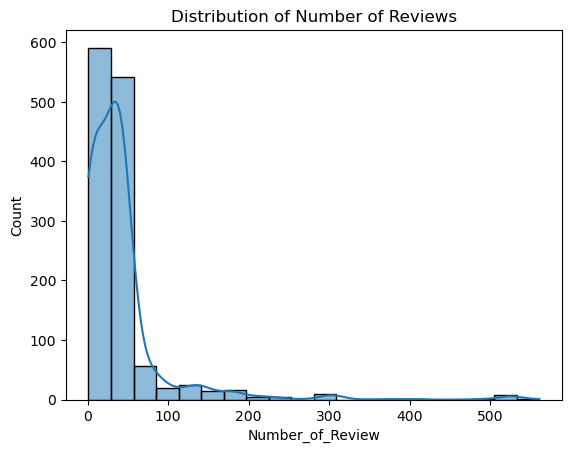

In [21]:
# Distribution of 'Number_of_Reviews'
plt.subplot(1, 1, 1)
sns.histplot(df['Number_of_Review'], bins=20, kde=True)
plt.title('Distribution of Number of Reviews')


maximum no review are present but approx high at 0 to 100 but low at 300.

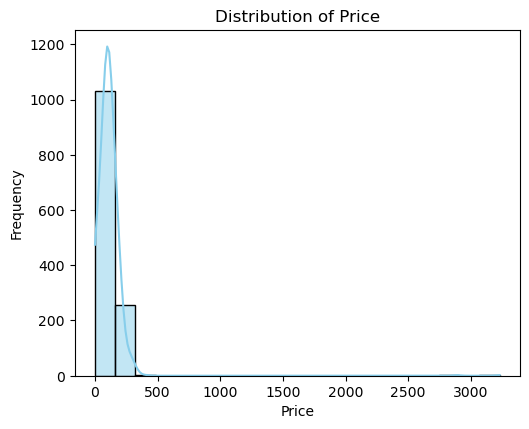

In [22]:
# Assuming your DataFrame is named df
plt.figure(figsize=(10, 8))

# Distribution of 'Price'
plt.subplot(2, 2, 3)
sns.histplot(df['Price'], bins=20, kde=True, color='skyblue')  # Adjust color as needed
plt.title('Distribution of Price')
plt.xlabel('Price')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

maximum price distributin approx 200 to 300.

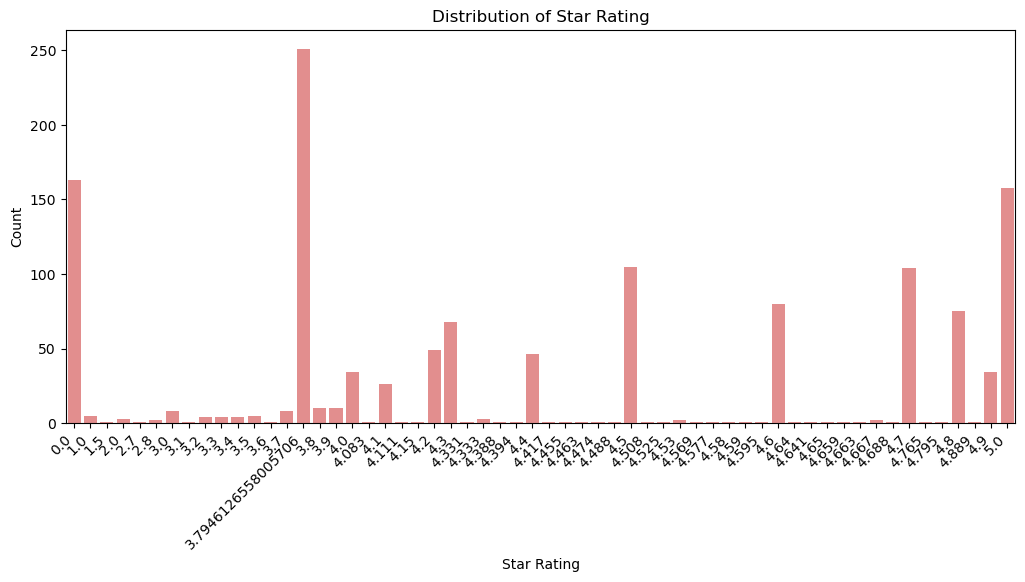

In [23]:
plt.figure(figsize=(20, 10))  # Increase the figure size

# Bar plot for 'Star_Rating'
plt.subplot(2, 2, 4)
sns.barplot(x=df['Star_Rating'].value_counts().index, y=df['Star_Rating'].value_counts(), color='lightcoral')  # Adjust color as needed
plt.title('Distribution of Star Rating')
plt.xlabel('Star Rating')
plt.ylabel('Count')

plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability

plt.tight_layout()
plt.show()

maximum rating is 3.7,4.5,and 5 and also no rating which is zero

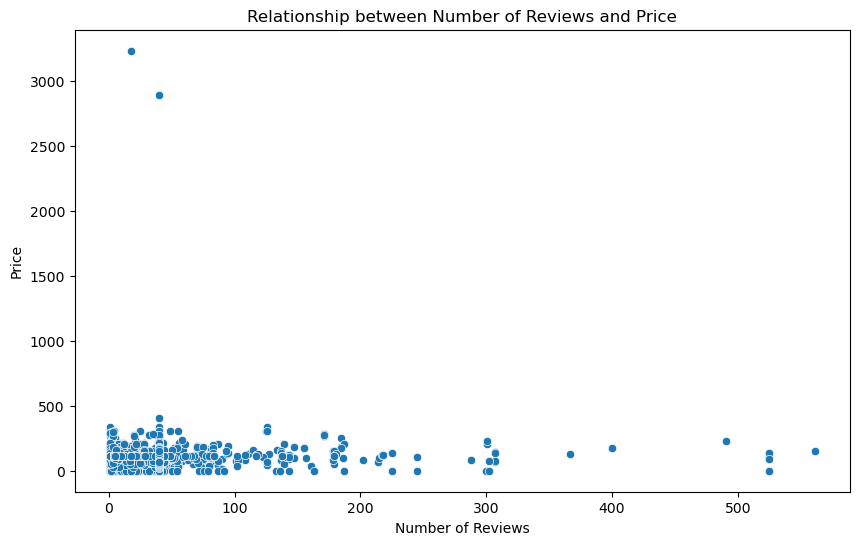

In [24]:
# Relationship between 'Price' and 'Number_of_Reviews'
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Number_of_Review', y='Price', data=df)
plt.title('Relationship between Number of Reviews and Price')
plt.xlabel('Number of Reviews')
plt.ylabel('Price')
plt.show()

number of review is maximum at price under 500 but low at 3000.

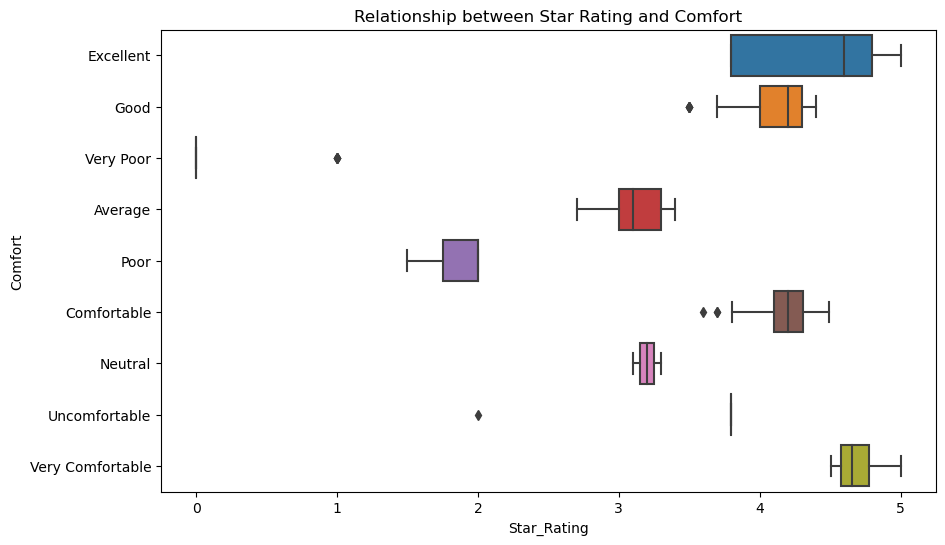

In [25]:
# Relationship between 'Star_Rating' and 'Comfort'
plt.figure(figsize=(10, 6))
sns.boxplot(x='Star_Rating', y='Comfort', data=df)
plt.title('Relationship between Star Rating and Comfort')
plt.show()

At star rating 5 ,comfortable and excellent more.at 2 show poor.

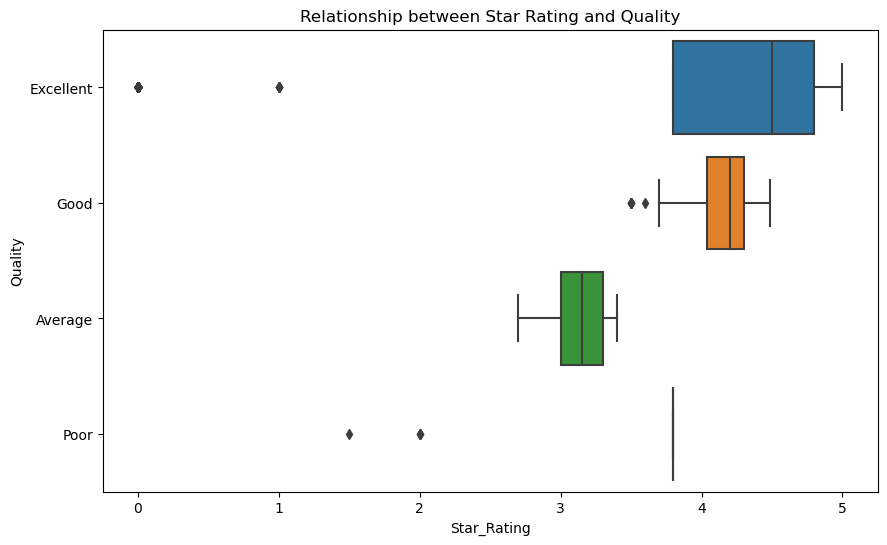

In [26]:
# Relationship between 'Star_Rating' and 'Quality'
plt.figure(figsize=(10, 6))
sns.boxplot(x='Star_Rating', y='Quality', data=df)
plt.title('Relationship between Star Rating and Quality')
plt.show()

At 5 excellent,at 3 star rating average.

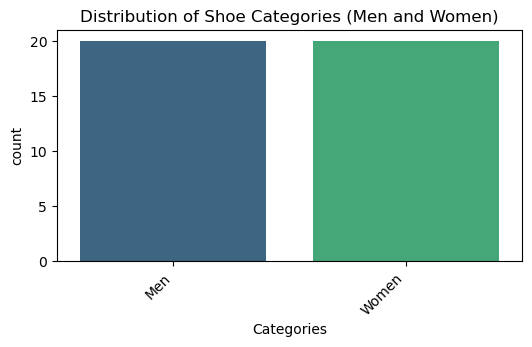

In [27]:
men_women_df = df[df['Categories'].isin(['Men', 'Women'])]

# Count plot 
plt.figure(figsize=(6, 3))
sns.countplot(x='Categories', data=men_women_df, palette='viridis')
plt.title('Distribution of Shoe Categories (Men and Women)')
plt.xticks(rotation=45, ha='right')
plt.show()

distribution of shoe in men and women equal

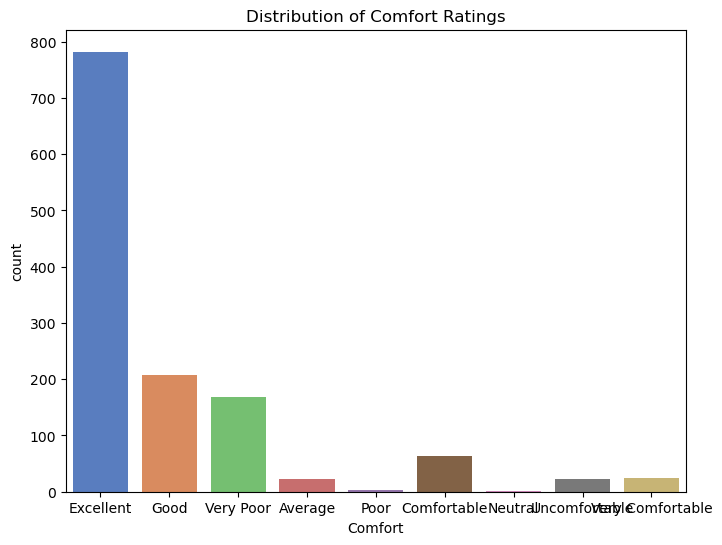

In [28]:
# Count plot for 'Comfort'
plt.figure(figsize=(8, 6))
sns.countplot(x='Comfort', data=df, palette='muted')
plt.title('Distribution of Comfort Ratings')
plt.show()

comfort is excellent for maximum shoes

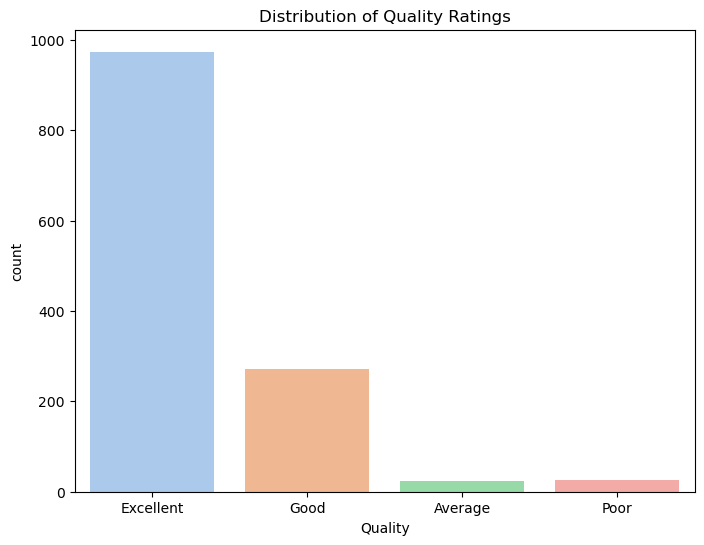

In [29]:
# Count plot for 'Quality'
plt.figure(figsize=(8, 6))
sns.countplot(x='Quality', data=df, palette='pastel')
plt.title('Distribution of Quality Ratings')
plt.show()

Quality is also maximum for number of shoes

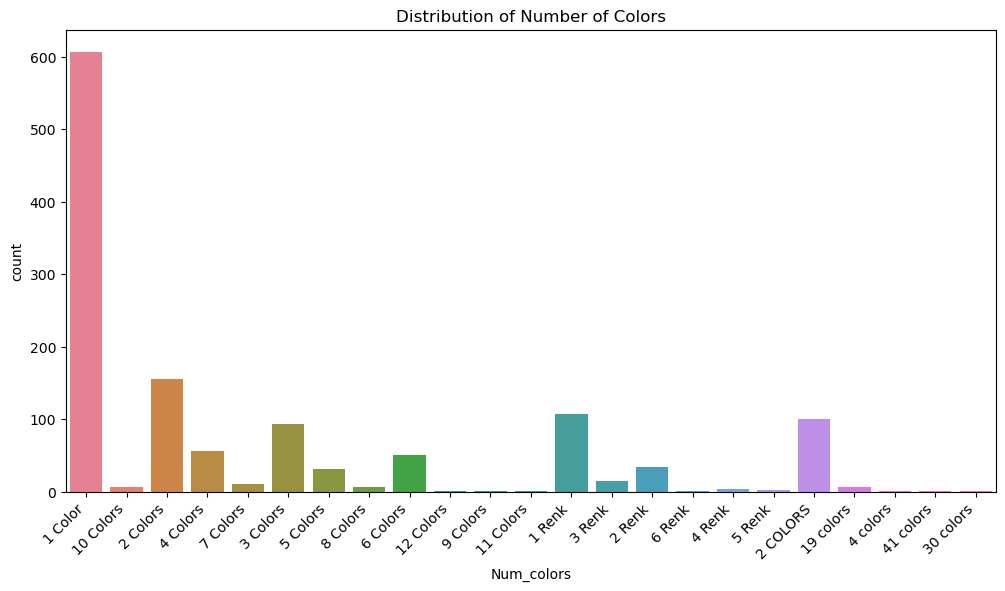

In [30]:
# Count plot for 'Num_colors'
plt.figure(figsize=(12, 6))
sns.countplot(x='Num_colors', data=df, palette='husl')
plt.title('Distribution of Number of Colors')
plt.xticks(rotation=45, ha='right')
plt.show()


shoe in one color is maximum.but less in 9,11,30,6,4,41.

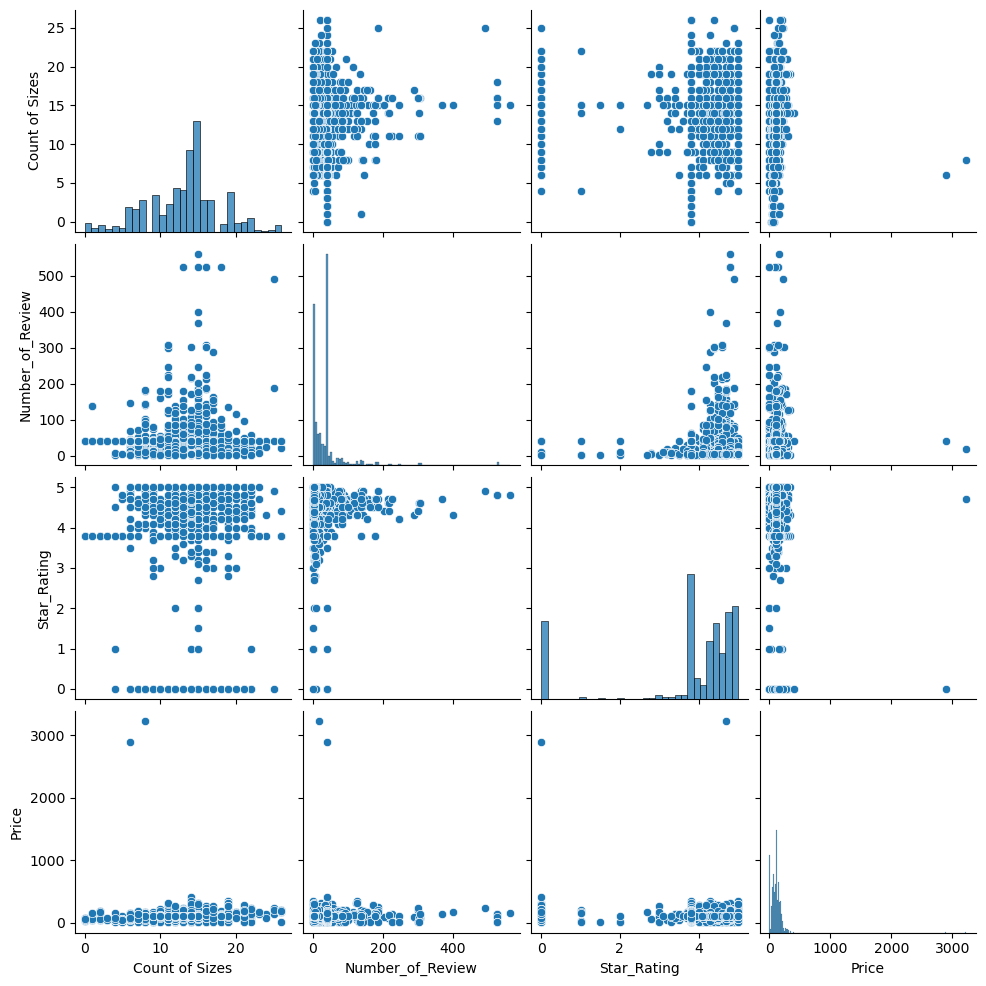

In [31]:
sns.pairplot(df)

# Label Encoder for categorical feature:

In [32]:
# Assuming your DataFrame is named df
categorical_columns = df.select_dtypes(include='object').columns

print(f'The categorical columns : {categorical_columns.tolist()}')


The categorical columns : ['Shoe_Name', 'Categories', 'Num_colors', 'colors 1', 'color 2', 'color3', 'color4', 'Product_Code', 'All_Sizes', 'Comfort', 'Quality']


In [33]:
from sklearn.preprocessing import LabelEncoder


label_encoder = LabelEncoder()

# Selecting categorical columns to be encoded
categorical_columns = ['Shoe_Name', 'Categories', 'Num_colors', 'colors 1', 'color 2', 'color3', 'color4', 'Product_Code', 'All_Sizes', 'Comfort', 'Quality']


for col in categorical_columns:
    if col in df.columns:
        df[f'{col}_encoded'] = label_encoder.fit_transform(df[col].astype(str))
        df.drop(col, axis=1, inplace=True)

df.head()


,Count of Sizes,Number_of_Review,Star_Rating,Price,Shoe_Name_encoded,Categories_encoded,Num_colors_encoded,colors 1_encoded,color 2_encoded,color3_encoded,color4_encoded,Product_Code_encoded,All_Sizes_encoded,Comfort_encoded,Quality_encoded
0,15.0,18.0,4.9,79.660753,21,173,0,122,11,147,122,712,78,2,1
1,15.0,367.0,4.7,129.196600,241,173,2,53,11,12,7,291,78,2,1
2,16.0,35.0,4.1,64.904753,374,102,7,53,82,156,122,498,126,3,2
3,15.0,34.0,4.5,62.649420,4,173,0,53,11,106,122,347,78,2,1
4,16.0,33.0,4.8,66.060753,15,102,0,153,5,127,19,664,140,2,1


In [34]:
#remove some irrelevant data
# Remove columns in place
df.drop(['color 2_encoded', 'color3_encoded', 'color4_encoded'], axis=1, inplace=True)


# check for statistical summary:

In [35]:
df.describe()

,Count of Sizes,Number_of_Review,Star_Rating,Price,Shoe_Name_encoded,Categories_encoded,Num_colors_encoded,colors 1_encoded,Product_Code_encoded,All_Sizes_encoded,Comfort_encoded,Quality_encoded
count,1294.000000,1294.000000,1294.000000,1294.000000,1294.000000,1294.000000,1294.000000,1294.000000,1294.000000,1294.000000,1294.000000,1294.000000
mean,13.153014,40.335247,3.794613,109.630589,372.566461,111.297527,4.425039,137.961360,604.813756,83.923493,3.026275,1.229521
std,4.756540,60.767736,1.526917,133.997588,214.802166,50.616191,5.565488,69.009252,321.720707,34.549240,2.159729,0.502763
min,0.000000,1.000000,0.000000,0.035697,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,10.000000,7.000000,3.794613,61.196600,195.250000,85.000000,0.000000,61.250000,323.250000,77.000000,2.000000,1.000000
50%,14.000000,38.000000,4.300000,108.796600,368.000000,102.000000,1.000000,161.000000,642.500000,78.000000,2.000000,1.000000
75%,15.000000,40.335247,4.700000,143.940000,543.000000,165.000000,7.000000,167.000000,935.000000,101.000000,3.000000,1.000000
max,26.000000,561.000000,5.000000,3229.660000,779.000000,199.000000,22.000000,297.000000,1088.000000,151.000000,8.000000,3.000000


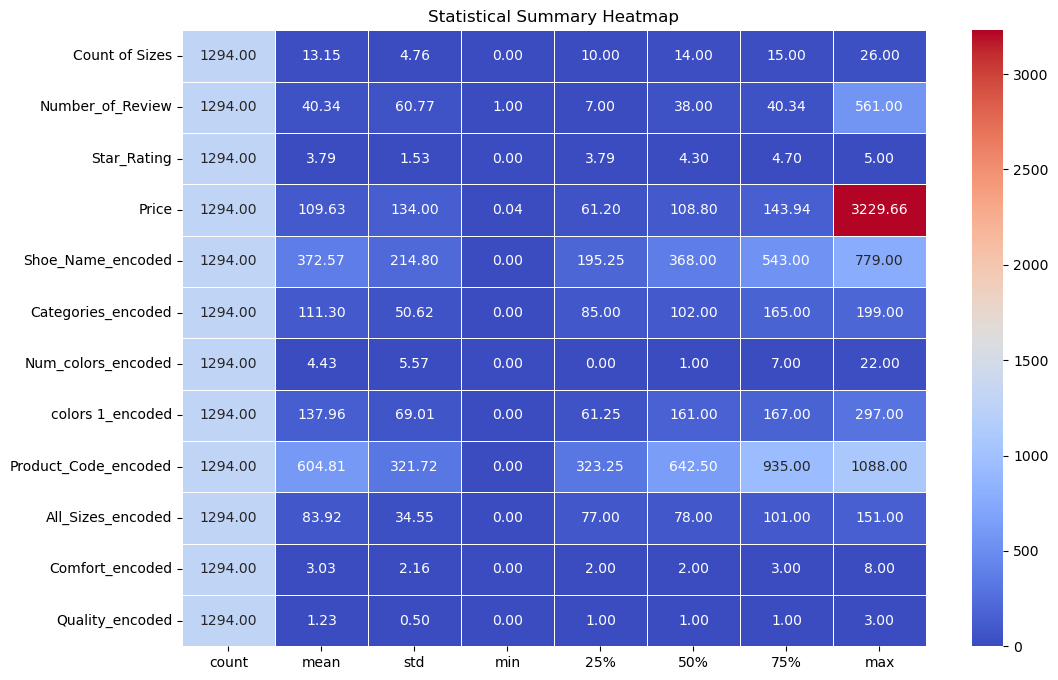

In [36]:
# Calculate statistical summary for the DataFrame except the non-numeric columns
stat_summary = df.describe()

# Transpose the summary for a better visualization
stat_summary = stat_summary.transpose()

plt.figure(figsize=(12, 8))
sns.heatmap(stat_summary, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Statistical Summary Heatmap')
plt.show()

# Correlation

In [37]:
# Calculating the correlation matrix
correlation_matrix = df.corr()

correlation_matrix

,Count of Sizes,Number_of_Review,Star_Rating,Price,Shoe_Name_encoded,Categories_encoded,Num_colors_encoded,colors 1_encoded,Product_Code_encoded,All_Sizes_encoded,Comfort_encoded,Quality_encoded
Count of Sizes,1.000000,0.029769,0.024885,0.122510,0.081921,-0.034956,0.117878,-0.382689,-0.028079,0.227523,0.010976,0.049984
Number_of_Review,0.029769,1.000000,0.023176,0.014135,-0.117989,0.043913,0.067722,-0.034424,-0.159853,0.165552,-0.028084,-0.035521
Star_Rating,0.024885,0.023176,1.000000,-0.020147,-0.032217,0.037451,0.170103,-0.009596,-0.281026,0.051081,-0.851136,0.104802
Price,0.122510,0.014135,-0.020147,1.000000,-0.014828,0.081248,0.043569,-0.072222,0.056129,0.085720,0.015158,0.001106
Shoe_Name_encoded,0.081921,-0.117989,-0.032217,-0.014828,1.000000,-0.017467,0.056205,0.050750,-0.077631,-0.087480,0.034549,0.123719
Categories_encoded,-0.034956,0.043913,0.037451,0.081248,-0.017467,1.000000,0.085337,-0.027857,0.030456,-0.063959,-0.020221,0.013999
Num_colors_encoded,0.117878,0.067722,0.170103,0.043569,0.056205,0.085337,1.000000,-0.088896,-0.211817,-0.011246,-0.210687,0.049963
colors 1_encoded,-0.382689,-0.034424,-0.009596,-0.072222,0.050750,-0.027857,-0.088896,1.000000,0.057554,-0.156704,-0.133048,-0.004537
Product_Code_encoded,-0.028079,-0.159853,-0.281026,0.056129,-0.077631,0.030456,-0.211817,0.057554,1.000000,0.224662,0.232433,-0.293828
All_Sizes_encoded,0.227523,0.165552,0.051081,0.085720,-0.087480,-0.063959,-0.011246,-0.156704,0.224662,1.000000,-0.028383,-0.140532


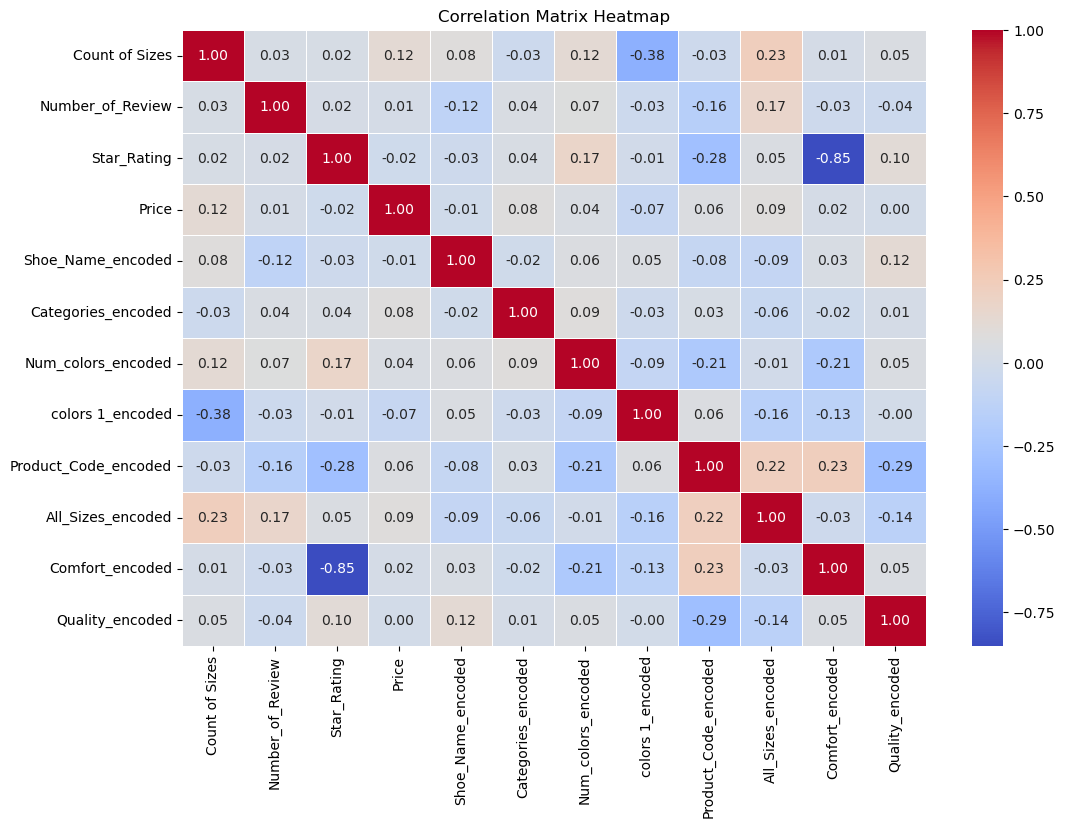

In [38]:
# Plotting the correlation matrix as a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

Values Range: The values of the correlation coefficient range between -1 and 1.

-Values close to 1 indicate a strong positive correlation.

-Values close to -1 indicate a strong negative correlation.

-Values around 0 suggest no linear correlation. Correlation Between Features:

#  Check Outliers

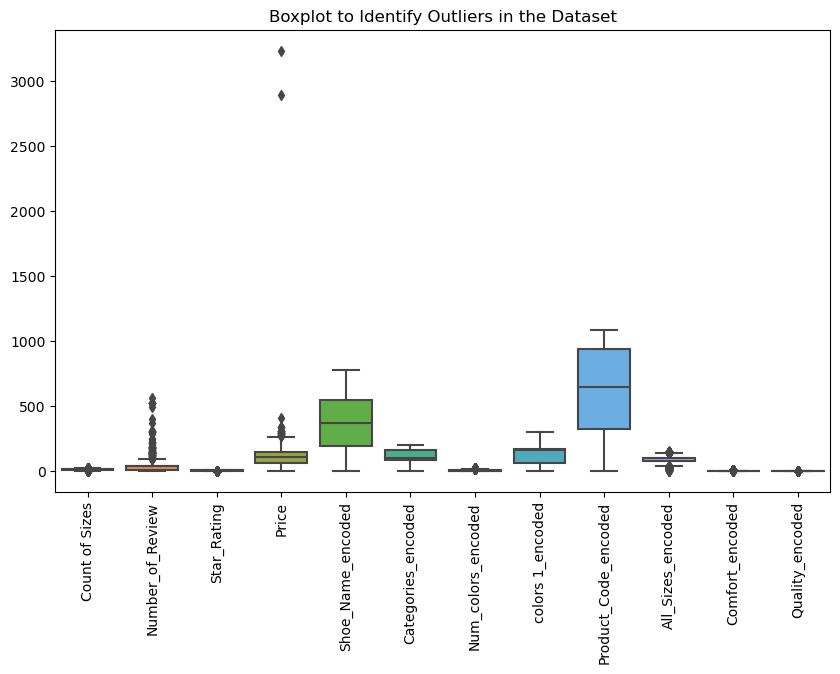

In [39]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df)
plt.xticks(rotation=90)  # Rotating x-axis labels for better visibility
plt.title("Boxplot to Identify Outliers in the Dataset")
plt.show()

In this,Number oi review,Price,contain max outlier

# Data Cleaning

In [40]:
from scipy import stats


z_scores = np.abs(stats.zscore(df._get_numeric_data()))
threshold = 3

df_new = df[(z_scores < threshold).all(axis=1)]


In [41]:
df_new

,Count of Sizes,Number_of_Review,Star_Rating,Price,Shoe_Name_encoded,Categories_encoded,Num_colors_encoded,colors 1_encoded,Product_Code_encoded,All_Sizes_encoded,Comfort_encoded,Quality_encoded
0,15.0,18.000000,4.900000,79.660753,21,173,0,122,712,78,2,1
2,16.0,35.000000,4.100000,64.904753,374,102,7,53,498,126,3,2
3,15.0,34.000000,4.500000,62.649420,4,173,0,53,347,78,2,1
4,16.0,33.000000,4.800000,66.060753,15,102,0,153,664,140,2,1
5,11.0,40.335247,0.000000,30.746087,404,171,0,167,544,82,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1289,2.0,40.335247,3.794613,178.446000,67,102,0,268,935,78,2,1
1290,2.0,40.335247,3.794613,59.970000,767,102,0,270,935,78,2,1
1291,2.0,40.335247,3.794613,167.946000,61,102,0,265,935,78,2,1
1292,3.0,40.335247,3.794613,67.152000,104,102,0,268,935,78,2,1


In [42]:
# Calculate the percentage loss after removing outliers
original_rows = df.shape[0]
rows_after_outliers_removal = df_new.shape[0]

percentage_loss = ((original_rows - rows_after_outliers_removal) / original_rows) * 100

print(f"Percentage loss after outlier removal: {percentage_loss:.2f}%")


Percentage loss after outlier removal: 4.10%


after applying Z score 4.10% data loss

In [43]:
from scipy import stats

# Assuming df_new is your cleaned DataFrame after applying Z-score
z_scores_new = np.abs(stats.zscore(df_new._get_numeric_data()))
threshold = 3

# Filter DataFrame based on Z-scores
df_new_no_outliers = df_new[(z_scores_new < threshold).all(axis=1)]

# Calculate skewness for each column in the cleaned DataFrame
skewness_no_outliers = df_new_no_outliers.skew()

# Print skewness values
print(skewness_no_outliers)


Count of Sizes         -0.276615
Number_of_Review        1.179343
Star_Rating            -1.769090
Price                   0.397423
Shoe_Name_encoded      -0.012313
Categories_encoded     -0.253867
Num_colors_encoded      1.129274
colors 1_encoded        0.242535
Product_Code_encoded   -0.366880
All_Sizes_encoded      -0.034025
Comfort_encoded         1.628008
Quality_encoded         0.826618
dtype: float64


In [44]:
df_new.skew()

Count of Sizes         -0.276920
Number_of_Review        2.317686
Star_Rating            -1.816743
Price                   0.517240
Shoe_Name_encoded      -0.018297
Categories_encoded     -0.275021
Num_colors_encoded      1.139665
colors 1_encoded        0.243839
Product_Code_encoded   -0.318807
All_Sizes_encoded      -0.044425
Comfort_encoded         1.676289
Quality_encoded         0.853459
dtype: float64

# Part 1: Traget-Price

In [45]:
X= df_new.drop(['Price'], axis = 1)
y = df_new['Price']

In [46]:
from sklearn.preprocessing import power_transform
X = power_transform(X)
X

array([[ 0.36502293, -0.21151063,  1.0234186 , ..., -0.18339555,
        -0.33436327, -0.3796058 ],
       [ 0.58399152,  0.39382237, -0.04926739, ...,  1.23292584,
         0.35048109,  1.70882934],
       [ 0.36502293,  0.3651031 ,  0.45137716, ..., -0.18339555,
        -0.33436327, -0.3796058 ],
       ...,
       [-2.19492499,  0.53760497, -0.3861281 , ..., -0.18339555,
        -0.33436327, -0.3796058 ],
       [-2.0265605 ,  0.53760497, -0.3861281 , ..., -0.18339555,
        -0.33436327, -0.3796058 ],
       [-2.35389864,  0.53760497, -0.3861281 , ..., -0.18339555,
        -0.33436327, -0.3796058 ]])

In [47]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X = scaler.fit_transform(X)
X

array([[ 0.36502293, -0.21151063,  1.0234186 , ..., -0.18339555,
        -0.33436327, -0.3796058 ],
       [ 0.58399152,  0.39382237, -0.04926739, ...,  1.23292584,
         0.35048109,  1.70882934],
       [ 0.36502293,  0.3651031 ,  0.45137716, ..., -0.18339555,
        -0.33436327, -0.3796058 ],
       ...,
       [-2.19492499,  0.53760497, -0.3861281 , ..., -0.18339555,
        -0.33436327, -0.3796058 ],
       [-2.0265605 ,  0.53760497, -0.3861281 , ..., -0.18339555,
        -0.33436327, -0.3796058 ],
       [-2.35389864,  0.53760497, -0.3861281 , ..., -0.18339555,
        -0.33436327, -0.3796058 ]])

# Data Preprocessing

In [48]:
# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Model Training

# Linear Regressor

In [49]:
model = LinearRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)  # Calculate RMSE
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R2) Score: {r2:.2f}")

Mean Absolute Error (MAE): 47.04
Mean Squared Error (MSE): 3824.04
Root Mean Squared Error (RMSE): 61.84
R-squared (R2) Score: 0.18


# KNeighborsRegressor

In [50]:
k = 5  
model = KNeighborsRegressor(n_neighbors=k)


model.fit(X_train, y_train)


y_pred = model.predict(X_test)


mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)  # Calculate RMSE
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R2) Score: {r2:.2f}")

Mean Absolute Error (MAE): 39.98
Mean Squared Error (MSE): 3140.55
Root Mean Squared Error (RMSE): 56.04
R-squared (R2) Score: 0.32


# Random Forest Regression

In [51]:
model = RandomForestRegressor(n_estimators=100, random_state=42)  

model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)  # Calculate RMSE
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R2) Score: {r2:.2f}")

Mean Absolute Error (MAE): 30.23
Mean Squared Error (MSE): 2064.87
Root Mean Squared Error (RMSE): 45.44
R-squared (R2) Score: 0.55


# Decision Tree Regression 

In [52]:
model = DecisionTreeRegressor(random_state=42)  

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)  # Calculate RMSE
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R2) Score: {r2:.2f}")

Mean Absolute Error (MAE): 35.86
Mean Squared Error (MSE): 3235.89
Root Mean Squared Error (RMSE): 56.88
R-squared (R2) Score: 0.30


# GradientBoostingRegressor

In [53]:
from sklearn.ensemble import GradientBoostingRegressor

model_gb = GradientBoostingRegressor(n_estimators=100, random_state=42)

model_gb.fit(X_train, y_train)
y_pred_gb = model_gb.predict(X_test)

# Evaluate 
mae_gb = mean_absolute_error(y_test, y_pred_gb)
mse_gb = mean_squared_error(y_test, y_pred_gb)
rmse_gb = mean_squared_error(y_test, y_pred_gb, squared=False)
r2_gb = r2_score(y_test, y_pred_gb)


print("Gradient Boosting Regressor:")
print(f"Mean Absolute Error (MAE): {mae_gb:.2f}")
print(f"Mean Squared Error (MSE): {mse_gb:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_gb:.2f}")
print(f"R-squared (R2) Score: {r2_gb:.2f}")


Gradient Boosting Regressor:
Mean Absolute Error (MAE): 33.00
Mean Squared Error (MSE): 2280.20
Root Mean Squared Error (RMSE): 47.75
R-squared (R2) Score: 0.51


Based on the above result, the Gradient Boosting Regressor seems to be performing the best among the models considered, as it has the lowest MAE, MSE, and RMSE, and the highest R2 Score. 

# Hyper Parameter Tuning

In [54]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor

param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}


gb_model = GradientBoostingRegressor(random_state=42)

# Create GridSearchCV object
grid_search = GridSearchCV(estimator=gb_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Fit the model to the data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Predict the target variable for the test set using the best model
y_pred = grid_search.best_estimator_.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Print the best hyperparameters and evaluation metrics
print("Best Hyperparameters:", best_params)
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2) Score:", r2)


Best Hyperparameters: {'learning_rate': 0.2, 'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 100}
Mean Absolute Error (MAE): 26.822927958378603
Mean Squared Error (MSE): 1527.6229252815258
Root Mean Squared Error (RMSE): 39.084817068543714
R-squared (R2) Score: 0.6707547572683956


In [69]:
from sklearn.model_selection import GridSearchCV

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 150],        # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],        # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],       # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]          # Minimum number of samples required to be at a leaf node
}

# Create a RandomForestRegressor model
rf_model = RandomForestRegressor(random_state=42)

# Use GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Train the model with the best hyperparameters
best_rf_model = grid_search.best_estimator_
best_rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = best_rf_model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)  # Calculate RMSE
r2 = r2_score(y_test, y_pred)

# Print the best hyperparameters and evaluation metrics
print("Best Hyperparameters:", best_params)
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R2) Score: {r2:.2f}")


Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}
Mean Absolute Error (MAE): 30.73
Mean Squared Error (MSE): 2130.04
Root Mean Squared Error (RMSE): 46.15
R-squared (R2) Score: 0.54


The hyperparameter tuning has improved the performance of the Gradient Boosting model. The R-squared (R2) score of 0.67 indicates that the model explains a significant portion of the variance in the target variable.

# Save Model

In [55]:
import pickle

# Save the model to a file
with open('shoebrand_price.pkl', 'wb') as file:
    pickle.dump(gb_model, file)

# conclusion

In [56]:
gb_model.fit(X_train, y_train)
predicted = gb_model.predict(X_test)
a = np.array(y_test)
df_conclusion = pd.DataFrame({"Original": a, "Predicted": predicted}, index=range(len(a)))
print(df_conclusion)

     Original   Predicted
0    149.5966  122.804713
1    132.5966  125.587564
2     71.3966  128.039817
3     40.7966   43.812749
4    173.3966  134.880515
..        ...         ...
244   42.4966   49.761983
245  152.9966  116.439082
246   54.3966   48.187373
247  178.4460   89.905940
248  200.5966  164.552260

[249 rows x 2 columns]


# Visualization

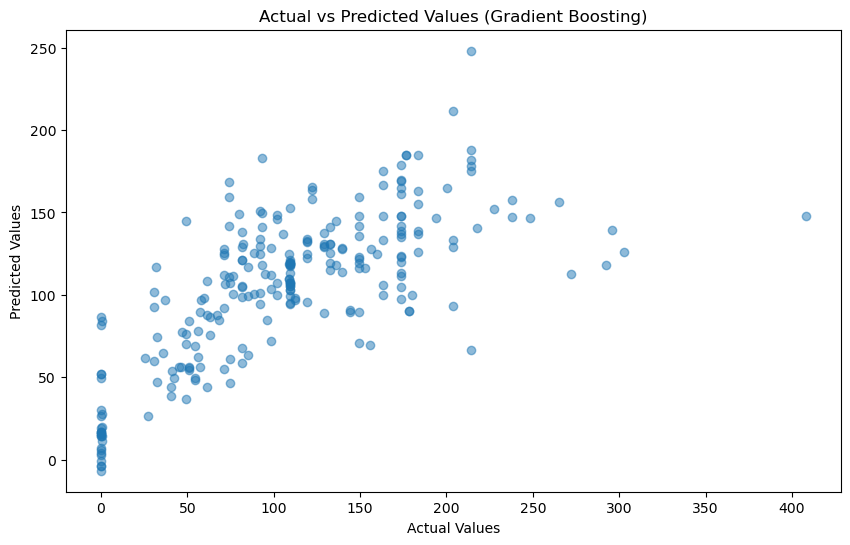

In [57]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, predicted, alpha=0.5)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values (Gradient Boosting)")
plt.show()

# Part-2  Target Star Rating

In [58]:
X1 = df_new.drop(['Star_Rating'], axis=1)
y1 = df_new['Star_Rating']


In [59]:
from sklearn.preprocessing import power_transform
X1= power_transform(X1)
X1

array([[ 0.36502293, -0.21151063, -0.22023842, ..., -0.18339555,
        -0.33436327, -0.3796058 ],
       [ 0.58399152,  0.39382237, -0.44727618, ...,  1.23292584,
         0.35048109,  1.70882934],
       [ 0.36502293,  0.3651031 , -0.48350101, ..., -0.18339555,
        -0.33436327, -0.3796058 ],
       ...,
       [-2.19492499,  0.53760497,  0.91526472, ..., -0.18339555,
        -0.33436327, -0.3796058 ],
       [-2.0265605 ,  0.53760497, -0.41161617, ..., -0.18339555,
        -0.33436327, -0.3796058 ],
       [-2.35389864,  0.53760497,  0.74814156, ..., -0.18339555,
        -0.33436327, -0.3796058 ]])

In [60]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X1 = scaler.fit_transform(X1)
X1

array([[ 0.36502293, -0.21151063, -0.22023842, ..., -0.18339555,
        -0.33436327, -0.3796058 ],
       [ 0.58399152,  0.39382237, -0.44727618, ...,  1.23292584,
         0.35048109,  1.70882934],
       [ 0.36502293,  0.3651031 , -0.48350101, ..., -0.18339555,
        -0.33436327, -0.3796058 ],
       ...,
       [-2.19492499,  0.53760497,  0.91526472, ..., -0.18339555,
        -0.33436327, -0.3796058 ],
       [-2.0265605 ,  0.53760497, -0.41161617, ..., -0.18339555,
        -0.33436327, -0.3796058 ],
       [-2.35389864,  0.53760497,  0.74814156, ..., -0.18339555,
        -0.33436327, -0.3796058 ]])

# Data Preprocessing

In [61]:
 # Split the data into training and testing sets (70% train, 30% test)
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.3, random_state=42)


# Model Training

# Linear Regression

In [62]:

linear_reg_model = LinearRegression()


linear_reg_model.fit(X1_train, y1_train)


y1_pred = linear_reg_model.predict(X1_test)

mse = mean_squared_error(y1_test, y1_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y1_test, y1_pred)

# Print the evaluation metrics
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R2) Score: {r2:.2f}")


Mean Squared Error (MSE): 1.17
Root Mean Squared Error (RMSE): 1.08
R-squared (R2) Score: 0.44


# RandomForestRegressor

In [63]:

random_forest_model = RandomForestRegressor(n_estimators=100, random_state=42)

random_forest_model.fit(X1_train, y1_train)

y1_pred_rf = random_forest_model.predict(X1_test)

# Evaluate the model
mae_rf = mean_absolute_error(y1_test, y1_pred_rf)
mse_rf = mean_squared_error(y1_test, y1_pred_rf)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y1_test, y1_pred_rf)

# Print the evaluation metrics
print(f"Mean Absolute Error (MAE): {mae_rf:.2f}")
print(f"Mean Squared Error (MSE): {mse_rf:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_rf:.2f}")
print(f"R-squared (R2) Score: {r2_rf:.2f}")


Mean Absolute Error (MAE): 0.09
Mean Squared Error (MSE): 0.03
Root Mean Squared Error (RMSE): 0.16
R-squared (R2) Score: 0.99


# DecisionTreeRegressor

In [64]:

decision_tree_model = DecisionTreeRegressor(random_state=42)

decision_tree_model.fit(X1_train, y1_train)

# Predict
y1_pred_dt = decision_tree_model.predict(X1_test)

# Evaluate
mae_dt = mean_absolute_error(y1_test, y1_pred_dt)
mse_dt = mean_squared_error(y1_test, y1_pred_dt)
rmse_dt = np.sqrt(mse_dt)
r2_dt = r2_score(y1_test, y1_pred_dt)

print(f"Mean Absolute Error (MAE): {mae_dt:.2f}")
print(f"Mean Squared Error (MSE): {mse_dt:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_dt:.2f}")
print(f"R-squared (R2) Score: {r2_dt:.2f}")


Mean Absolute Error (MAE): 0.12
Mean Squared Error (MSE): 0.05
Root Mean Squared Error (RMSE): 0.23
R-squared (R2) Score: 0.97


# KNeighborsRegressor

In [65]:

knn_model = KNeighborsRegressor()

knn_model.fit(X1_train, y1_train)

y1_pred_knn = knn_model.predict(X1_test)

# Evaluate the model
mae_knn = mean_absolute_error(y1_test, y1_pred_knn)
mse_knn = mean_squared_error(y1_test, y1_pred_knn)
rmse_knn = np.sqrt(mse_knn)
r2_knn = r2_score(y1_test, y1_pred_knn)

# Print the evaluation metrics
print(f"Mean Absolute Error (MAE): {mae_knn:.2f}")
print(f"Mean Squared Error (MSE): {mse_knn:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_knn:.2f}")
print(f"R-squared (R2) Score: {r2_knn:.2f}")


Mean Absolute Error (MAE): 0.15
Mean Squared Error (MSE): 0.06
Root Mean Squared Error (RMSE): 0.24
R-squared (R2) Score: 0.97


# GradientBoostingRegressor

In [66]:

gb_model = GradientBoostingRegressor()


gb_model.fit(X1_train, y1_train)


y1_pred_gb = gb_model.predict(X1_test)

# Evaluate 
mae_gb = mean_absolute_error(y1_test, y1_pred_gb)
mse_gb = mean_squared_error(y1_test, y1_pred_gb)
rmse_gb = np.sqrt(mse_gb)
r2_gb = r2_score(y1_test, y1_pred_gb)

# Print the evaluation metrics
print(f"Mean Absolute Error (MAE): {mae_gb:.2f}")
print(f"Mean Squared Error (MSE): {mse_gb:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse_gb:.2f}")
print(f"R-squared (R2) Score: {r2_gb:.2f}")


Mean Absolute Error (MAE): 0.11
Mean Squared Error (MSE): 0.03
Root Mean Squared Error (RMSE): 0.16
R-squared (R2) Score: 0.99


Based on the provided result, both Gradient Boosting and Random Forest models have similar and high R-squared scores, indicating good model fit

# Hyper Parameter Tuning

In [67]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


param_grid = {
    'learning_rate': [0.1, 0.01, 0.001],
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}


gb_model = GradientBoostingRegressor()

# Perform Grid Search
grid_search = GridSearchCV(gb_model, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X1_train, y1_train)


best_params = grid_search.best_params_


best_model = grid_search.best_estimator_
y1_pred = best_model.predict(X1_test)

# 
mae = mean_absolute_error(y1_test, y1_pred)
mse = mean_squared_error(y1_test, y1_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y1_test, y1_pred)

print("Best Hyperparameters:", best_params)
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2) Score:", r2)


Best Hyperparameters: {'learning_rate': 0.1, 'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 50}
Mean Absolute Error (MAE): 0.10639933637672896
Mean Squared Error (MSE): 0.0239411044239566
Root Mean Squared Error (RMSE): 0.15472913243457614
R-squared (R2) Score: 0.9886592943044817


random forest before tuning have good r2 score.

# Save Model

In [71]:
import pickle

# Save the model to a file
with open('shoebrandrating_price.pkl', 'wb') as file:
    pickle.dump(random_forest_model, file)

# Conclusion

In [73]:
random_forest_model.fit(X1_train, y1_train)  
predicted = random_forest_model.predict(X1_test)  
a = np.array(y1_test)
df_conclusion = pd.DataFrame({"Original": a, "Predicted": predicted}, index=range(len(a)))
print(df_conclusion)

     Original  Predicted
0    5.000000   4.680000
1    5.000000   4.911000
2    5.000000   4.889000
3    5.000000   4.890000
4    3.000000   3.057000
..        ...        ...
368  4.700000   4.645000
369  3.794613   3.806667
370  4.530000   4.625410
371  5.000000   4.878000
372  5.000000   4.972000

[373 rows x 2 columns]


# Visualization

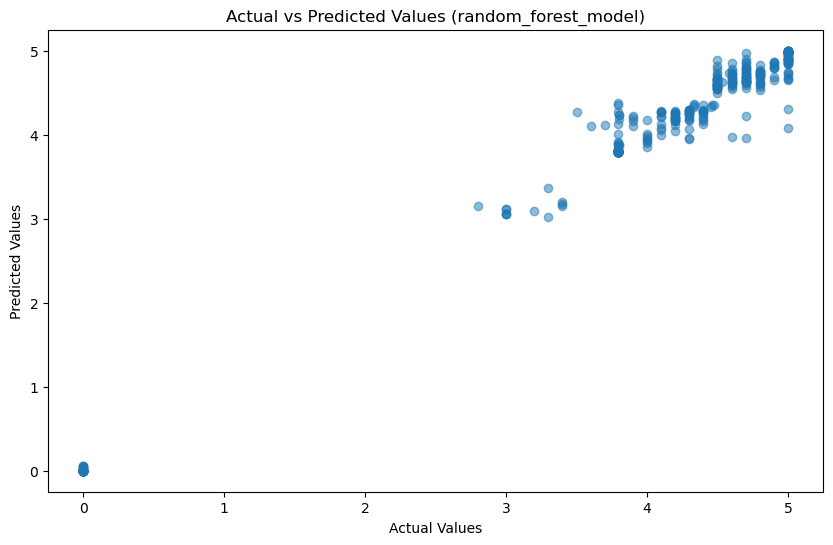

In [76]:
plt.figure(figsize=(10, 6))


plt.scatter(y1_test, predicted, alpha=0.5)


plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values (random_forest_model)")

# Display the plot
plt.show()